In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy.linalg as linalg

In [2]:
M_best = np.array([
    [0.63, 0.63, 1.20, 1.20, 1.20, 1.20, 1.20, 1.20, 1.20, 1.20, 1.20, 1.20, 1.20, 1.20, 1.20, 1.20],
    [0.34, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00, 0.00],
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.71, 0.00]])

In [3]:
init_vals = np.array([[10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]])
hunt = np.array([[35,10,2,2,2,2,1,1,0,0,0,0,0,0,0,0]])

def hunt_best_constant(T = 50,init_vals= init_vals):
    
    i = 0
    total_p = np.zeros(T+1)
    tvec = np.arange(T+1)
    while i <=T:
        
        if i == 0:
            x_n = M_best.dot(init_vals.transpose())
            x_n = x_n - hunt.transpose()
            total_p[i] = sum(x_n)
        else:
            x_n = M_best.dot(x_n)
            x_n = x_n - hunt.transpose()

            total_p[i] = sum(x_n)
        i = i + 1
        
    return total_p
total_p = hunt_best_constant()

Text(0, 0.5, 'Population')

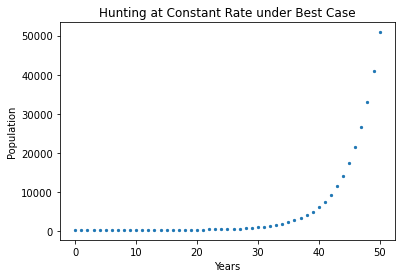

In [4]:
number = np.arange(51)
total_p = hunt_best_constant()
plt.scatter(number, total_p,s = 5)
plt.title('Hunting at Constant Rate under Best Case')
plt.xlabel('Years')
plt.ylabel('Population')

In [5]:
D = np.zeros((16,16))
prop = np.array([[0.4,0.1,0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.1]])
np.fill_diagonal(D,prop)

def hunt_best_prop(T = 50,init_vals= init_vals):
    
    i = 0
    total_p = np.zeros(T+1)
    tvec = np.arange(T+1)
    while i <=T:
        
        if i == 0:
            x_n = M_best.dot(init_vals.transpose())
            x_n = x_n - D.dot(x_n)
            total_p[i] = sum(x_n)
        else:
            x_n = M_best.dot(x_n)
            x_n = x_n - D.dot(x_n)

            total_p[i] = sum(x_n)
        i = i + 1
        
    return total_p

total_p = hunt_best_prop()
print(total_p)

[206.56       206.18827    196.24969398 191.89773535 190.53939703
 190.20494324 190.51681072 191.29456412 192.39255028 193.73469174
 195.11526307 196.46621805 197.80760888 199.16227242 200.53540927
 201.9372822  203.26896009 204.57707461 205.90267042 207.24998145
 208.61134599 209.98325451 211.36507013 212.75649875 214.15725573
 215.56716161 216.98610028 218.41418221 219.85158393 221.29842142
 222.75476021 224.22065476 225.69615459 227.18137119 228.67638932
 230.18126214 231.69604196 233.22079009 234.7555718  236.30045303
 237.8555001  239.42077995 240.99636011 242.58230864 244.17869396
 245.78558481 247.4030503  249.03116002 250.66998403 252.31959284
 253.98005742]


Text(0, 0.5, 'Population')

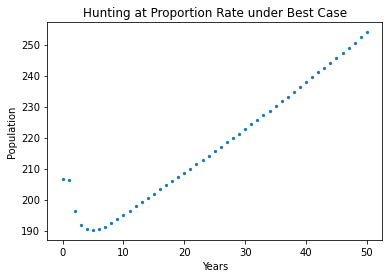

In [6]:
number = np.arange(51)
total_p = hunt_best_prop()
plt.scatter(number, total_p,s = 5)
plt.title('Hunting at Proportion Rate under Best Case')
plt.xlabel('Years')
plt.ylabel('Population')